In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Data File
df = pd.read_csv('C:/Users/chatu/OneDrive/Documents/Projects/Python Projects/CCCCCCCCCCCCCCCCCCCC.csv')

In [3]:
# Display the first few rows of the Data File
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Case\nGhana=T,ID of household,Gender,Ethnicity,AGE,HH_Prop,Investment%,NaN,plot size in acre,main crop,other crops,what was on it?,year when trees were planted
1,Case,HH_ID,NaN,NaN,NaN,WLTH,investment,Wsupply,size_acre,main_crop,o_crops,land_use_before,year_planting
2,Tp1,5,F,Ewe,58,3,0,OB,1.5,cocoa,"plantain,cassava",farm,2018
3,Tp2,7,M,Twi,54,5,0,W,10.5,cocoa,"cassava,yam,cocoyam,plantain,pineapple",forest,2012
4,Tp3,8,M,Twi,50,4,0,W,4,cocoa,"timber,plantain,cocoyam,Banana",farm,2012


In [4]:
# Clean Data File by renaming columns based on the second row and drop the extra rows
df.columns = df.iloc[1]
df = df[2:]

# Format column names
df.columns = ["Case", "Household_ID", "Gender", "Ethnicity", "Age", "Wealth", "Investment", "Water_Supply", "Plot_Size_Acre", "Main_Crop", "Other_Crops", "Land_Use_Before", "Year_Planting"]

# Convert relevant columns to numeric where applicable
df["Plot_Size_Acre"] = pd.to_numeric(df["Plot_Size_Acre"])
df["Year_Planting"] = pd.to_numeric(df["Year_Planting"])

# Display the first few row of cleaned data
df.head()

,Case,Household_ID,Gender,Ethnicity,Age,Wealth,Investment,Water_Supply,Plot_Size_Acre,Main_Crop,Other_Crops,Land_Use_Before,Year_Planting
2,Tp1,5,F,Ewe,58,3,0,OB,1.5,cocoa,"plantain,cassava",farm,2018
3,Tp2,7,M,Twi,54,5,0,W,10.5,cocoa,"cassava,yam,cocoyam,plantain,pineapple",forest,2012
4,Tp3,8,M,Twi,50,4,0,W,4.0,cocoa,"timber,plantain,cocoyam,Banana",farm,2012
5,Tp4,9,F,Twi,57,2,50,NOB,6.5,oil palm,NaN,bush,2015
6,Tp5,9,F,Twi,57,2,50,NOB,3.5,oil palm,NaN,bush,2012


In [11]:
# Question: For each line determine how much land was planted between 2012 and out of that how much was deforested from forest or bush

# Filter rows where planting year is 2012 or later
planted_data = df[df["Year_Planting"] >= 2012]

# Calculate total land planted
total_planted_area = planted_data["Plot_Size_Acre"].sum()

# Filter for land use before as "forest" or "bush"
deforested_data = planted_data[planted_data["Land_Use_Before"].isin(["forest", "bush"])]
deforested_area = deforested_data["Plot_Size_Acre"].sum()

print("The result of the analysis shows:")
print(" ")
print("Total land planted (2012 and later):", total_planted_area, "acres")
print('Land deforested from "forest" or "bush":', deforested_area, "acres")

The result of the analysis shows:
 
Total land planted (2012 and later): 242.80000000000004 acres
Land deforested from "forest" or "bush": 99.48 acres


In [28]:
# Define categories for land use before planting
def categorize_land_use(row):
    if row["Land_Use_Before"] == "forest":
        return "forest_cleared"
    elif row["Land_Use_Before"] == "bush":
        return "bush_cleared"
    elif row["Land_Use_Before"] == "farm":
        return "farmland_replanted"
    else:
        return "Unknown_Land_Use"

# Add a column for land use category
planted_data["Land_Use_Category"] = planted_data.apply(categorize_land_use, axis=1)

# Group by household ID and aggregate
aggregated_data = planted_data.groupby("Household_ID").agg(total_planted=("Plot_Size_Acre", "sum"), forest_cleared=("Plot_Size_Acre", lambda x: x[planted_data["Land_Use_Category"] == "forest_cleared"].sum()), bush_cleared=("Plot_Size_Acre", lambda x: x[planted_data["Land_Use_Category"] == "bush_cleared"].sum()), farmland_replanted=("Plot_Size_Acre", lambda x: x[planted_data["Land_Use_Category"] == "farmland_replanted"].sum()), unknown_land_use=("Plot_Size_Acre", lambda x: x[planted_data["Land_Use_Category"] == "unknown_land_use"].sum())).reset_index()

print(" The aggregate data by Household ID for planted tree crops, forest cleared, bush cleared, farmland replanted and unknown land use (in acres) are:")
print(" ")
print(aggregated_data)


 The aggregate data by Household ID for planted tree crops, forest cleared, bush cleared, farmland replanted and unknown land use (in acres) are:
 
   Household_ID  total_planted  forest_cleared  bush_cleared  \
0            11           4.00             0.0          0.00   
1            12           1.50             0.0          0.00   
2            13          19.32             0.0         18.00   
3            20          15.00             0.0          0.00   
4            21          15.00             0.0         15.00   
5            22           3.00             0.0          0.00   
6            23          11.00             0.0          0.00   
7            25           3.08             0.0          3.08   
8            26          10.32             0.0          0.00   
9            27          13.50             0.0          0.00   
10           30          15.50            15.5          0.00   
11           31           2.00             0.0          0.00   
12           33     

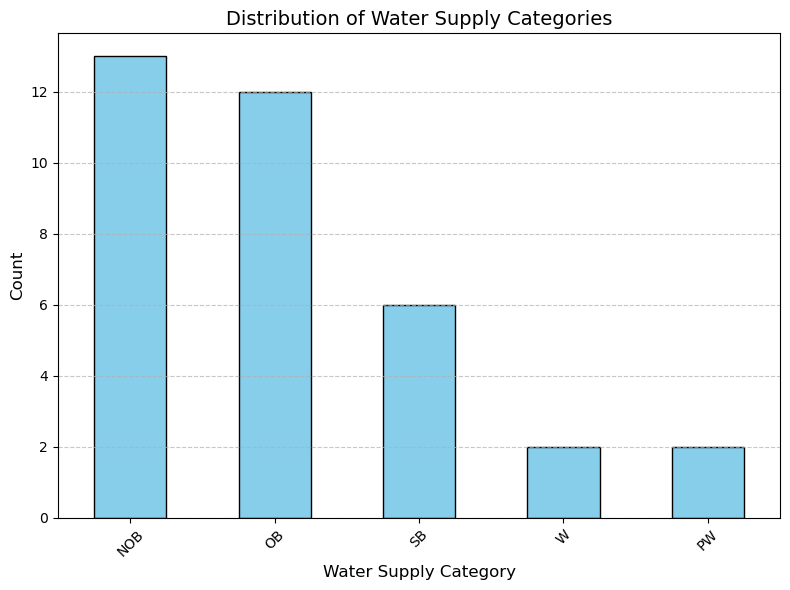

In [34]:
# Count occurrences of each category in the "Water_Supply" column
water_supply_counts = df["Water_Supply"].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
water_supply_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution of Water Supply Categories", fontsize=14)
plt.xlabel("Water Supply Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()